## A notebook just to take an initial look at the data for IML assignment 2

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy
import astropy.units as u
import astropy.coordinates as coord

from sklearn.model_selection import train_test_split
import umap.umap_ as umap 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import FastICA

from sklearn import tree
from sklearn import ensemble

In [2]:
def read_in_data(filename = 'data/A2_data.csv'):
    '''reads in the data from the given csv, and saves it in a Pandas dataframe'''
    df = pd.read_csv(filename)
    
    return df

In [95]:
df = read_in_data()
I_remove=np.where(df['u']<0)[0]
df = df.drop(I_remove)
df = df.reset_index(drop=True)

df

,alpha,delta,u,g,r,i,z,field_ID,MJD,redshift,plate,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,79,56064,-0.001584,854,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,53727,-0.824700,3292,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,120,54883,-0.418000,5888,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,214,51783,5.953000,536,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,137,56069,0.846000,9427,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,581,55590,1.046000,4683,GALAXY
99995,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,289,53531,5.290000,6969,GALAXY
99996,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,308,58162,-4.145000,5491,GALAXY
99997,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,131,52376,7.152000,6115,GALAXY


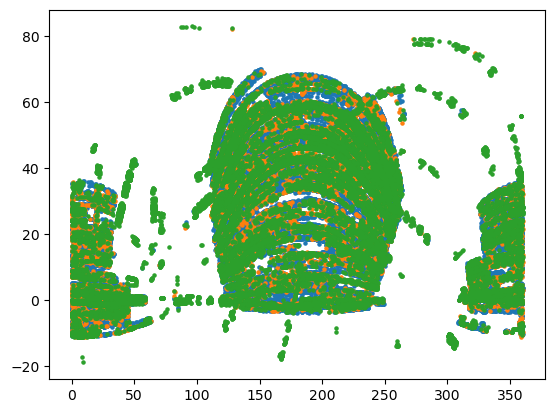

In [96]:
plt.scatter(df['alpha'][df['class']=='GALAXY'], df['delta'][df['class']=='GALAXY'], s = 5)
plt.scatter(df['alpha'][df['class']=='QSO'], df['delta'][df['class']=='QSO'], s = 5)
plt.scatter(df['alpha'][df['class']=='STAR'], df['delta'][df['class']=='STAR'], s = 5)

In [97]:
ra = coord.Angle(df['alpha']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(df['delta']*u.degree)

new_df_arr = np.array([ra,dec,df['class']])
plot_df = pd.DataFrame(np.transpose(new_df_arr), columns = ['ra','dec','class'])

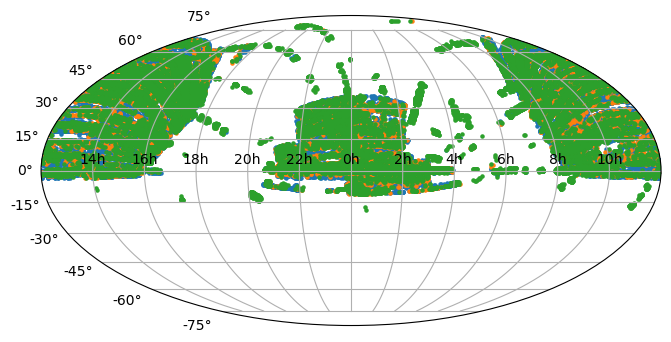

In [98]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection="mollweide")

for cls in ['GALAXY', 'QSO', 'STAR']:
    ra_sub = plot_df.loc[plot_df['class'] == cls, 'ra']*u.degree.to(u.rad)
    dec_sub = plot_df.loc[plot_df['class'] == cls, 'dec']*u.degree.to(u.rad)
    
    ax.scatter(ra_sub, dec_sub, s = 5, label = cls)
    ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
    ax.grid(True)

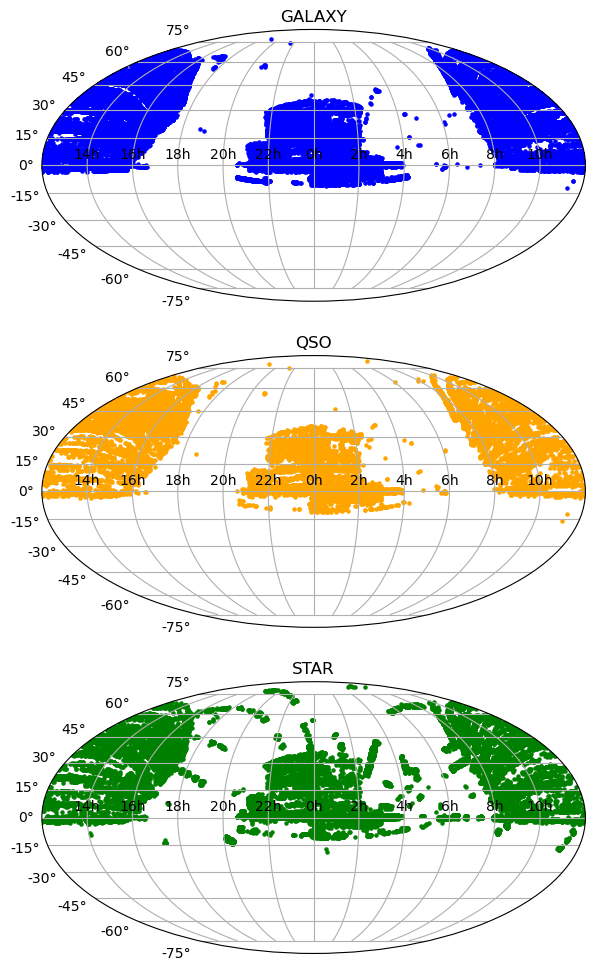

In [99]:
fig = plt.figure(figsize=(8,12))
colors = ['blue', 'orange', 'green']

for idx, cls in enumerate(['GALAXY', 'QSO', 'STAR']):
    loc = 311+idx
    ax = fig.add_subplot(loc, projection="mollweide")
    ra_sub = plot_df.loc[plot_df['class'] == cls, 'ra']*u.degree.to(u.rad)
    dec_sub = plot_df.loc[plot_df['class'] == cls, 'dec']*u.degree.to(u.rad)
    
    ax.scatter(ra_sub, dec_sub, s = 5, c=colors[idx])
    ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
    ax.grid(True)
    ax.set_title(cls)

### CMDs

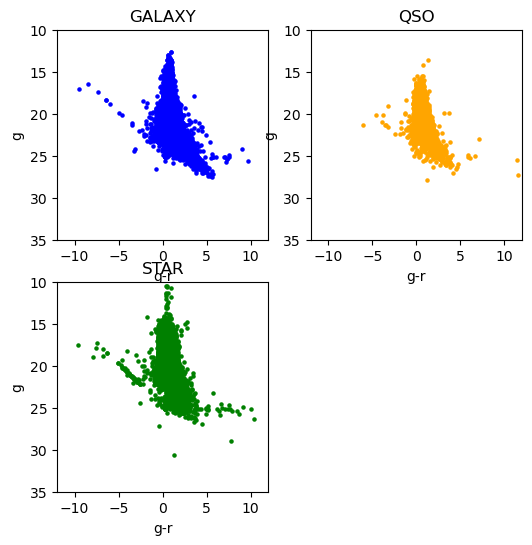

In [104]:
fig = plt.figure(figsize=(6,6))

colors = ['blue', 'orange', 'green']

for idx, cls in enumerate(['GALAXY', 'QSO', 'STAR']):
    loc = 221+idx
    ax = fig.add_subplot(loc)
    ra_sub = plot_df.loc[plot_df['class'] == cls, 'ra']*u.degree.to(u.rad)
    dec_sub = plot_df.loc[plot_df['class'] == cls, 'dec']*u.degree.to(u.rad)
    
    color = df.loc[df['class'] == cls, 'g'] - df.loc[df['class'] == cls, 'r']
    mag = df.loc[df['class'] == cls, 'g']
    ax.scatter(color, mag, s = 5, c=colors[idx])
    
    ax.set_xlim(-12,12)
    ax.set_ylim(10,35)
    ax.set_title(cls)
    ax.set_xlabel('g-r')
    ax.set_ylabel('g')
    
    plt.gca().invert_yaxis()

In [198]:
def resplit(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)#, random_state=92
    X_train,y_train=X_train.reset_index(drop=True),y_train.reset_index(drop=True)
    X_test,y_test=X_test.reset_index(drop=True),y_test.reset_index(drop=True)
    return (X_train, X_test, y_train, y_test)

In [200]:
path = "data/"

data=pd.read_csv(path+'A2_data.csv')
X,y= data.loc[:, data.columns != 'class'], data['class']

print(f'There are {X.shape[0]} samples of each {X.shape[1]} features')

#Data includes some identifiers lets remove those 
ID_parameters= ['field_ID','MJD','plate']#, 'alpha', 'delta'
for ID in ID_parameters:
    X=X.loc[:, X.columns != ID]

#We know that a flux should be positive so remove the datapoint which does not have that
#This datapoint has value -9999 so not a detection but a instrumentation issue
I_remove=np.where(X['u']<0)[0]
X,y = X.drop(I_remove),y.drop(I_remove)
X,y=X.reset_index(drop=True),y.reset_index(drop=True)

print(f'There are final {X.shape[0]} samples of now {X.shape[1]} features')

X_train, X_test, y_train, y_test = resplit(X,y)


print(f'There are {X_train.shape[0]} training samples of each {X_train.shape[1]} features')

There are 100000 samples of each 11 features
There are final 99999 samples of now 8 features
There are 66999 training samples of each 8 features


### Correlation Plot

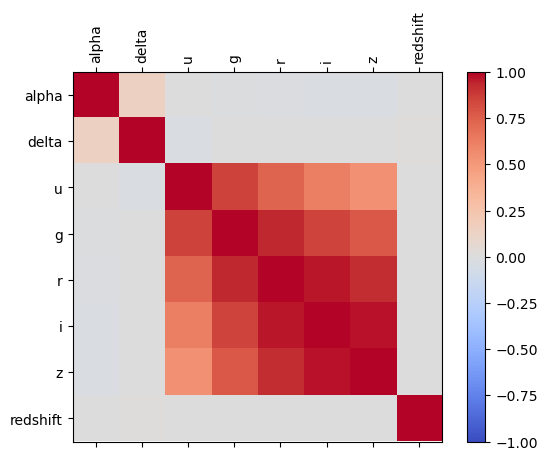

In [194]:
corr = X.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns)
ax.set_yticklabels(X.columns)
plt.show()

### Decision Tree Classifier

In [209]:
X_train, X_test, y_train, y_test = resplit(X,y)

In [213]:
clf = tree.DecisionTreeClassifier(criterion = 'log_loss')
clf = clf.fit(X_train, y_train)

In [214]:
out = clf.predict(X_test)

In [215]:
test = np.count_nonzero(np.equal(out, y_test))/y_test.size
print(test)

0.8092424242424242


In [175]:
# importances = clf.feature_importances_
# feature_names = X.columns
# tree_importances = pd.Series(importances, index=feature_names)

# x_locs = range(importances.size)

# fig = plt.figure()
# ax = fig.add_subplot(111)

# tree_importances.plot.bar()
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")

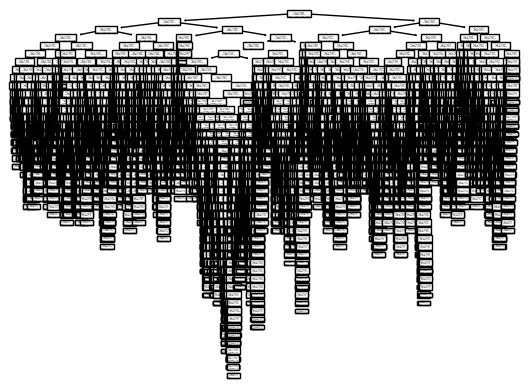

In [62]:
tree.plot_tree(clf);

### Random Forest Ensemble:

In [188]:
ens = ensemble.RandomForestClassifier()

In [189]:
ens.fit(X_train, y_train)

RandomForestClassifier()

In [190]:
output=ens.predict(X_test)

In [191]:
test = np.count_nonzero(np.equal(output, y_test))/y_test.size
print(test)

0.8721212121212121


Text(0, 0.5, 'Mean decrease in impurity')

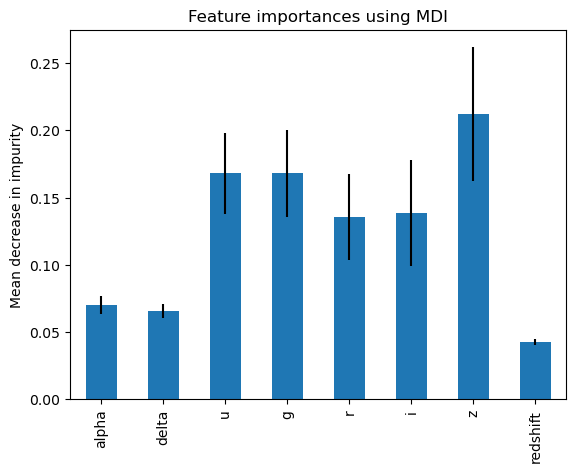

In [192]:
importances = ens.feature_importances_
std = np.std([tree.feature_importances_ for tree in ens.estimators_], axis=0)

feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

x_locs = range(importances.size)

fig = plt.figure()
ax = fig.add_subplot(111)

forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")